In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [3]:
# Read the City data file and store it in a pandas DataFrame.
city_data_df=pd.read_csv(city_data_to_load)

In [4]:
# Read the Ride data file and store it in a pandas DataFrame.
ride_data_df=pd.read_csv(ride_data_to_load)

In [5]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Print the first 10 rows of the new DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


# Deliverable 1: Summary DataFrame

In [6]:
# To create the different columns' data to be displayed in Summary DataFrame.
total_rides_df = pyber_data_df.groupby(['type']).count()['ride_id']
total_drivers_df=city_data_df.groupby(['type']).sum()["driver_count"]
total_fares_df=pyber_data_df.groupby(["type"]).sum()["fare"]
average_fare_per_ride_df=total_fares_df/total_rides_df
average_fare_per_driver_df=total_fares_df/total_drivers_df

In [7]:
# To create the summary DataFrame.
summary_data_frame_df = pd.DataFrame({
             "Total Rides": total_rides_df,
             "Total Drivers": total_drivers_df,
             "Total Fares": total_fares_df,
             "Average Fare per Ride": average_fare_per_ride_df,
             "Average Fare per Driver": average_fare_per_driver_df,
           })
summary_data_frame_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [8]:
# To format the the summary DataFrame
summary_data_frame_df["Total Rides"] = summary_data_frame_df["Total Rides"].map("{:,.0f}".format)
summary_data_frame_df["Total Drivers"] = summary_data_frame_df["Total Drivers"].map("{:,.0f}".format)
summary_data_frame_df["Total Fares"] = summary_data_frame_df["Total Fares"].map("${:,.2f}".format)
summary_data_frame_df["Average Fare per Ride"] = summary_data_frame_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_data_frame_df["Average Fare per Driver"] = summary_data_frame_df["Average Fare per Driver"].map("${:,.2f}".format)

# To delete the index name
summary_data_frame_df.index.name= None

summary_data_frame_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


# Deliverable 2: Multiple-Line Plot for the Sum of the Fares for Each City Type

In [9]:
# To rename the columns in the combined DataFrame.
renamed_pyber_data_df = pyber_data_df.rename(columns={"city": "City", "date": "Date", "fare": "Fare",
                                      "ride_id": "Ride ID", "driver_count": "No. Drivers", "type": "City Type"})
renamed_pyber_data_df

,City,Date,Fare,Ride ID,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [10]:
# To set index as Date column.
renamed_pyber_data_df.set_index("Date")

,City,Fare,Ride ID,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [11]:
reduced_pyber_data_df=renamed_pyber_data_df[["Date", "City Type", "Fare"]].copy()
reduced_pyber_data_df

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,13.38
2371,2019-01-30 00:05:47,Rural,20.76
2372,2019-02-10 21:03:50,Rural,11.11
2373,2019-05-07 19:22:15,Rural,44.94


In [12]:
# To verify the data type using info() method.
reduced_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2375 non-null   object 
 1   City Type  2375 non-null   object 
 2   Fare       2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [13]:
# To change the Date column data type to Datetime.
reduced_pyber_data_df["Date"]=pd.to_datetime(reduced_pyber_data_df["Date"])
reduced_pyber_data_df

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,13.38
2371,2019-01-30 00:05:47,Rural,20.76
2372,2019-02-10 21:03:50,Rural,11.11
2373,2019-05-07 19:22:15,Rural,44.94


In [14]:
# Re-verify the data type for Date column is changed properly.
reduced_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2375 non-null   datetime64[ns]
 1   City Type  2375 non-null   object        
 2   Fare       2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [15]:
# To create a dataframe for sum of fare by date for each city type.
fares_by_city_by_date_df=pd.DataFrame(reduced_pyber_data_df.groupby(['Date', 'City Type']).sum()['Fare'])
fares_by_city_by_date_df

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [16]:
# To reset the index for the new dataframe.
fares_by_city_by_date_df.reset_index()

,Date,City Type,Fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [17]:
# To create a pivot table data frame.
table_df= pd.pivot_table(fares_by_city_by_date_df, values="Fare", index="Date", columns="City Type")
table_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [18]:
# To create a new dataframe with data between Jan 1st, 2019 and Apr 28th, 2019

jan_to_apr_table_df=table_df.loc['2019-01-01':'2019-04-28']
jan_to_apr_table_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [19]:
# To aggregate the fare by week.

weekly_fare_df=jan_to_apr_table_df.resample("W").sum()
weekly_fare_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


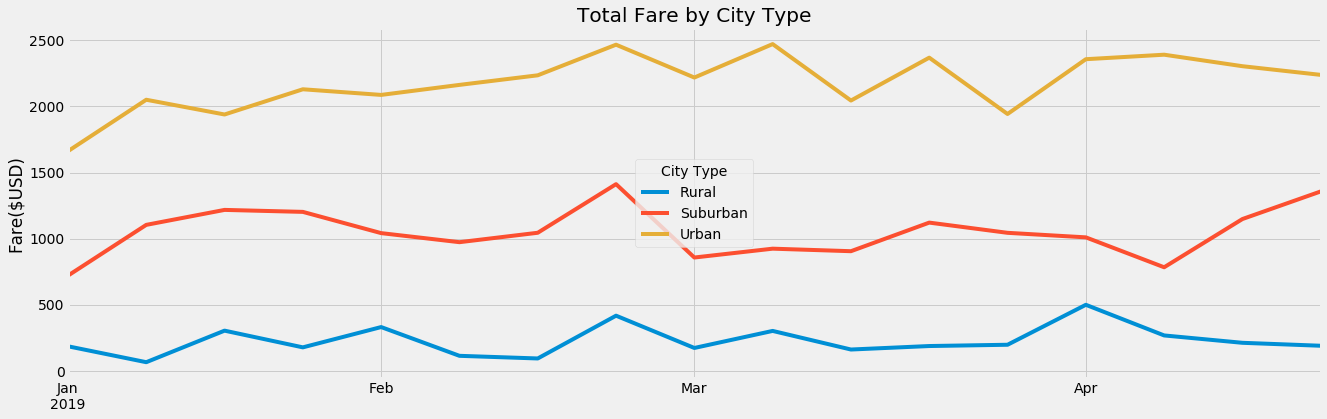

In [20]:
# To generate the chart

import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('fivethirtyeight')
weekly_fare_df.plot(figsize=(20,6), title='Total Fare by City Type', grid=True, legend=True)

plt.ylabel("Fare($USD)")
plt.xlabel(None)
plt.savefig("analysis/challenge.png")

